In [20]:
import pandas as pd
import numpy as np
import src.generation.gamma as ga
import src.generation.multivariate_normal as mn
from src.generation.base.generator import BaseGenerator

import matplotlib.pyplot as plt

from tqdm import tqdm

In [21]:
# params
N = 1000
F = N
size=100

In [22]:
def gamma_wrapper(cor: float) -> BaseGenerator:
    return ga.Generator(F, size, cor, (4,8))

def mn_wrapper(cor: float) -> BaseGenerator:
    return mn.Generator2(F, size, cor, (8,16), (1,1))

In [23]:
%%timeit
fg = gamma_wrapper(0)

34.3 ms ± 6.37 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [24]:
%%timeit
fg = gamma_wrapper(0)
fg.generate_cloud_load_vectors()

39.9 ms ± 9.69 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [25]:
%%timeit
fm = mn_wrapper(0)


31.4 ms ± 3.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [26]:
%%timeit
fm = mn_wrapper(0)
fm.generate_cloud_load_vectors()

40.5 ms ± 3.87 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [27]:
def calc(wrapper, cor: float):
    generator = wrapper(cor)
    vectors = generator.generate_cloud_load_vectors()
    cm = np.corrcoef(vectors)
    # return cm[cm != 1]
    return np.mean(cm[cm != 1]), np.sum(vectors)

calc(gamma_wrapper, 0.5)

(0.5379460975992153, 1253302.7643714692)

In [28]:
cor_rng = np.arange(0, 1.01, 0.05)

In [29]:
%%time
repeats = 500
ga_res = []

for cor in cor_rng:
    for _ in range(repeats):
        r_ga, l_ga= calc(gamma_wrapper, cor)

        ga_res.append((cor, r_ga, l_ga))

CPU times: user 1h 2min 44s, sys: 1h 26s, total: 2h 3min 10s
Wall time: 16min 57s


In [30]:
%%time
repeats = 500
mn_res = []

for cor in cor_rng:
    for _ in range(repeats):
        r_mn, l_mn = calc(mn_wrapper, cor)

        mn_res.append((cor, r_mn, l_mn))

CPU times: user 59min 22s, sys: 56min 17s, total: 1h 55min 39s
Wall time: 15min 44s


In [31]:
df_ga = pd.DataFrame(ga_res, columns=['expected', 'actual', 'load'])
df_mn = pd.DataFrame(mn_res, columns=['expected', 'actual', 'load'])

In [32]:
grped = df_ga.groupby('expected').agg({'actual': ['mean', 'count', 'std'], 'load': ['mean', 'count', 'std']})
mnped = df_mn.groupby('expected').agg({'actual': ['mean', 'count', 'std'], 'load': ['mean', 'count', 'std']})

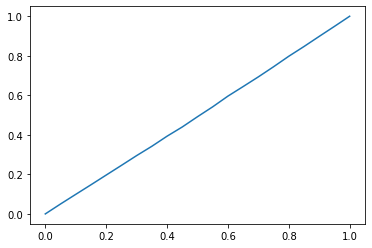

In [33]:
plt.plot(grped.index, grped.actual['mean'])
plt.show()

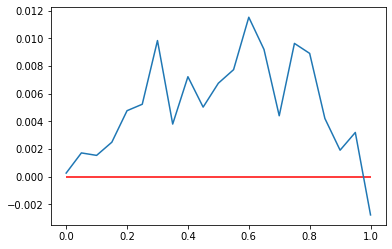

In [34]:
line = gamma_wrapper(0).get_estimated_cloud_load()
plt.plot(grped.index, (grped.load['mean']-line)/line)
plt.hlines(0, 0, 1, colors="red")
plt.show()

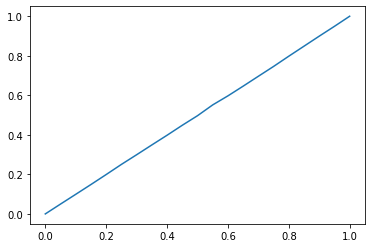

In [35]:
plt.plot(mnped.index, mnped.actual['mean'])
plt.show()

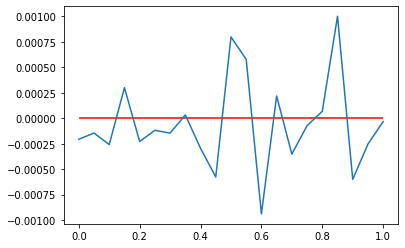

In [36]:
line = mn_wrapper(0).get_estimated_cloud_load()
plt.plot(mnped.index, (mnped.load['mean']-line)/line)
plt.hlines(0, 0, 1, colors="red")
plt.show()

In [37]:
grped

actual                              load                    
              mean count           std          mean count           std
expected                                                                
0.00      0.000250   500  1.370482e-04  1.200306e+06   500   7704.307392
0.05      0.050411   500  7.063446e-03  1.202058e+06   500  20113.525412
0.10      0.099120   500  1.294619e-02  1.201843e+06   500  26896.532027
0.15      0.147587   500  1.942188e-02  1.202986e+06   500  34260.783371
0.20      0.196678   500  2.343589e-02  1.205726e+06   500  38220.007907
0.25      0.245638   500  2.909905e-02  1.206284e+06   500  43905.247255
0.30      0.295069   500  3.103101e-02  1.211817e+06   500  44807.084846
0.35      0.342240   500  3.868684e-02  1.204565e+06   500  51106.192893
0.40      0.393293   500  3.960920e-02  1.208677e+06   500  52060.309877
0.45      0.439961   500  4.098627e-02  1.206036e+06   500  55462.084146
0.50      0.491791   500  4.527864e-02  1.208112e+06   500  60991.188140
0.55      0.541914   500  4.350793e-02  1.209289e+06   500  62664.458465
0.60      0.595986   500  4.471247e-02  1.213843e+06   500  63804.944065
0.65      0.644335   500  4.245640e-02  1.211044e+06   500  67062.515329
0.70      0.693361   500  3.675461e-02  1.205286e+06   500  71759.607313
0.75      0.744550   500  3.600049e-02  1.211571e+06   500  71218.268672
0.80      0.797688   500  3.242727e-02  1.210702e+06   500  76114.532846
0.85      0.846932   500  2.623461e-02  1.205053e+06   500  76526.078099
0.90      0.898167   500  1.882420e-02  1.202295e+06   500  82390.694000
0.95      0.948688   500  1.079788e-02  1.203834e+06   500  87167.533898
1.00      1.000000   500  2.400287e-09  1.196672e+06   500  89294.160983

In [38]:
mnped

actual                              load                    
              mean count           std          mean count           std
expected                                                                
0.00      0.000249   500  1.429947e-04  1.199753e+06   500   6948.887562
0.05      0.050052   500  7.092124e-03  1.199826e+06   500   7816.158262
0.10      0.099346   500  1.354865e-02  1.199690e+06   500   8064.464908
0.15      0.148948   500  1.875405e-02  1.200361e+06   500   8171.215531
0.20      0.199348   500  2.311950e-02  1.199727e+06   500   8509.463638
0.25      0.250611   500  2.647827e-02  1.199858e+06   500   9243.079331
0.30      0.299451   500  2.943799e-02  1.199825e+06   500   8923.888256
0.35      0.349070   500  3.405953e-02  1.200040e+06   500   8955.032495
0.40      0.398076   500  3.388495e-02  1.199647e+06   500   9860.284652
0.45      0.448535   500  3.523406e-02  1.199308e+06   500   9837.547438
0.50      0.496855   500  3.664971e-02  1.200959e+06   500  10252.918462
0.55      0.551589   500  3.484114e-02  1.200694e+06   500   9641.336992
0.60      0.597284   500  3.392618e-02  1.198873e+06   500   9989.828534
0.65      0.646344   500  3.257554e-02  1.200263e+06   500  10975.456901
0.70      0.696386   500  3.019983e-02  1.199578e+06   500  10860.956271
0.75      0.746107   500  2.750255e-02  1.199913e+06   500  11479.849749
0.80      0.797908   500  2.267929e-02  1.200082e+06   500  11480.245259
0.85      0.848568   500  1.871845e-02  1.201203e+06   500  11585.261051
0.90      0.899258   500  1.364565e-02  1.199281e+06   500  11521.894266
0.95      0.948977   500  6.934835e-03  1.199695e+06   500  11909.772378
1.00      1.000000   500  1.570927e-09  1.199962e+06   500  12113.155414